In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [54]:
data_origin = pd.read_csv("Diabetes_Classification.csv")
df = data_origin.copy()
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


About Dataset
The dataset consists of 100+ patient records. Each record contains the following information:

Age: The patient's age, in years.

Gender: The patient's gender, male or female.

BMI: The patient's body mass index (BMI), a measure of weight relative to height.

Blood pressure: The patient's blood pressure, in mmHg.

FBS: The patient's fasting blood sugar, in mg/dL.

HbA1c: The patient's hemoglobin A1c, a measure of blood sugar control over the past 3 months.

Family history of diabetes: Whether the patient has a family history of diabetes.

Smoking: Whether the patient smokes.

Diet: Whether the patient has a poor or healthy diet.

Exercise: Whether the patient exercises regularly.

Diagnosis: The patient's diagnosis, either diabetes or no diabetes.

In [55]:
df.tail()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
123,17,Female,15,Normal,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Normal,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,High,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,High,160,7.8,No,Yes,Poor,No,Yes
127,37,Female,34,High,180,8.5,No,Yes,Poor,No,Yes


In [56]:
df.shape

(128, 11)

In [57]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,128.0,42.031250,16.783915,12.0,28.0,40.0,55.000,75.0
BMI,128.0,35.359375,14.981739,10.0,24.0,34.0,45.500,67.0
FBS,128.0,162.500000,61.323975,80.0,120.0,160.0,205.000,280.0
HbA1c,128.0,7.887500,2.146339,5.0,6.4,7.8,9.375,12.0


In [60]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

We have '0' null values.

In [61]:
numeric_df = df.select_dtypes(include=np.number)

In [62]:
numeric_df.isnull().sum()

Age      0
BMI      0
FBS      0
HbA1c    0
dtype: int64

In [63]:
categoric_df=df.select_dtypes(include=["object"])

In [64]:
categoric_df.isnull().sum()

Gender                        0
Blood Pressure                0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [65]:
categoric_df.Gender.value_counts()

Gender
Male      68
Female    60
Name: count, dtype: int64

In [66]:
def find_uniques(data):
    for i in data.columns:
        print(f"Uniques values of df[{i}] are :",end=(f"\n{20*'*'}\n"))
        print(df[i].unique())

def find_value_counts(data):
    for i in data.columns:
        print(f"Values counts of df[{i}] are :",end=(f"\n{20*'*'}\n"))
        print(df[i].value_counts())

def find_value_counts_ct(data):
    for i in data.columns:
        print(f"Values counts of df[{i}] are :",end=(f"\n{20*'*'}\n"))
        print(df[i].value_counts().count())

In [67]:
numeric_df["BMI"].describe()

count    128.000000
mean      35.359375
std       14.981739
min       10.000000
25%       24.000000
50%       34.000000
75%       45.500000
max       67.000000
Name: BMI, dtype: float64

In [68]:
categories = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight','Not Fat', 'Overweight', 'Obese']

# Categorize BMI column
df['BMI_Categorize'] = pd.cut(df['BMI'], bins=categories, labels=labels)

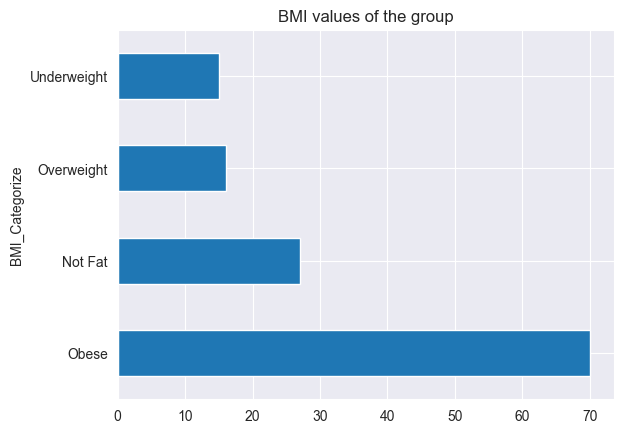

In [73]:
(df["BMI_Categorize"]
 .value_counts()
 .plot.barh()
 .set_title("BMI values of the group"));

<Axes: xlabel='BMI_Categorize'>

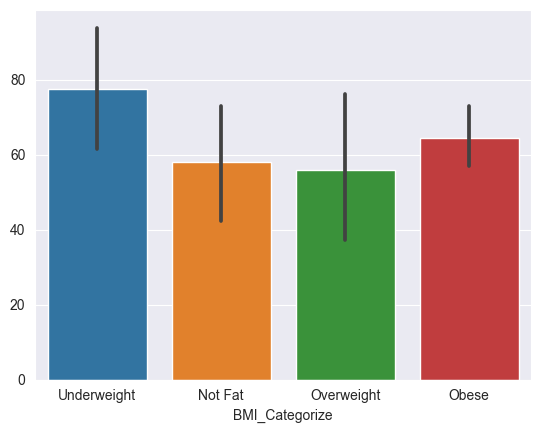

In [71]:
sns.barplot(x="BMI_Categorize", y=df.BMI_Categorize.index, data=df)

<Axes: ylabel='BMI_Categorize'>

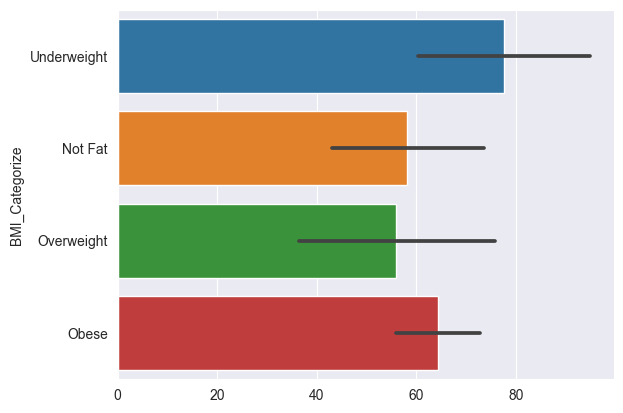

In [72]:
sns.barplot(x=df.BMI_Categorize.index, y="BMI_Categorize", data=df)

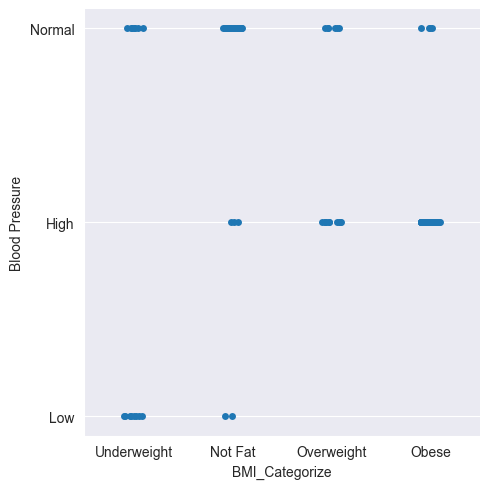

In [75]:
sns.catplot(x="BMI_Categorize",y="Blood Pressure", data=df)

<Axes: xlabel='BMI_Categorize', ylabel='Age'>

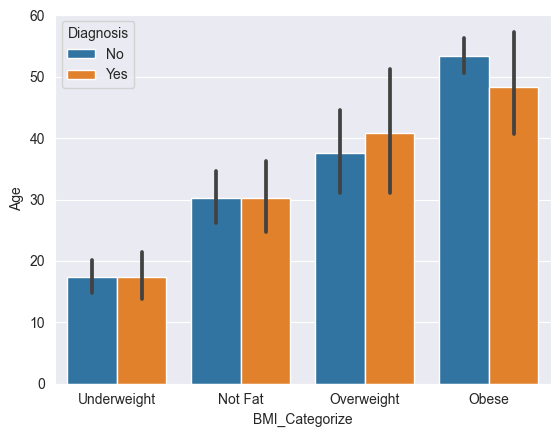

In [79]:
sns.barplot(x="BMI_Categorize",y="Age", hue="Diagnosis", data=df)

In [78]:
df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,BMI_Categorize
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No,Not Fat
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes,Overweight
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes,Obese
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes,Obese
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No,Not Fat
...,...,...,...,...,...,...,...,...,...,...,...,...
123,17,Female,15,Normal,100,5.7,No,Yes,Poor,No,Yes,Underweight
124,22,Male,19,Normal,120,6.4,No,Yes,Poor,No,Yes,Not Fat
125,27,Female,24,High,140,7.1,No,Yes,Poor,No,Yes,Not Fat
126,32,Male,29,High,160,7.8,No,Yes,Poor,No,Yes,Overweight


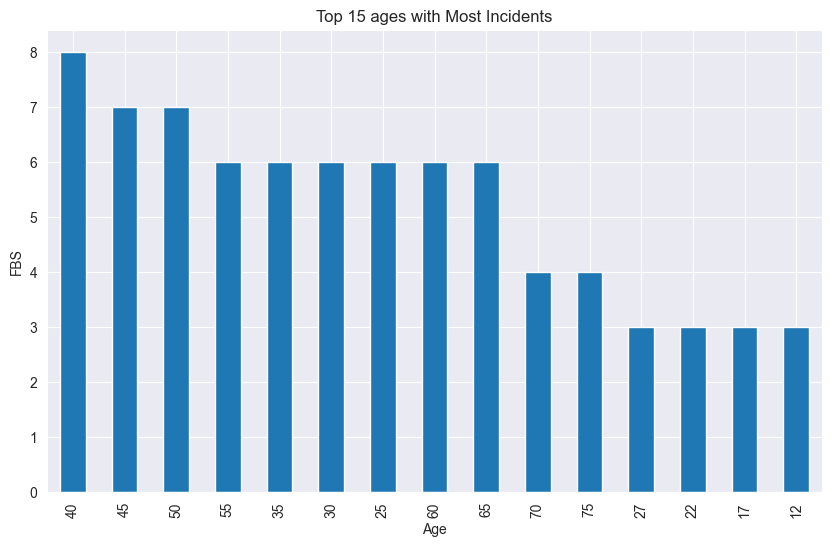

In [82]:


plt.figure(figsize=(10, 6))
df["Age"].value_counts().head(15).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('FBS')
plt.title('Top 15 ages with Most Incidents')
plt.xticks(rotation=90) # X degerlerini yatiriyor
plt.show()

In [92]:
df.groupby(["Age","BMI_Categorize"])["HbA1c"].mean()

Age  BMI_Categorize
12   Underweight       5.000
     Not Fat             NaN
     Overweight          NaN
     Obese               NaN
15   Underweight       5.000
                       ...  
70   Obese             9.200
75   Underweight         NaN
     Not Fat             NaN
     Overweight          NaN
     Obese             9.725
Name: HbA1c, Length: 140, dtype: float64

In [140]:
df_yes = df.loc[(df['Diagnosis'] == 'Yes')] # df_yes represents the people whose diagnosis is Positive.

<Axes: xlabel='BMI', ylabel='Count'>

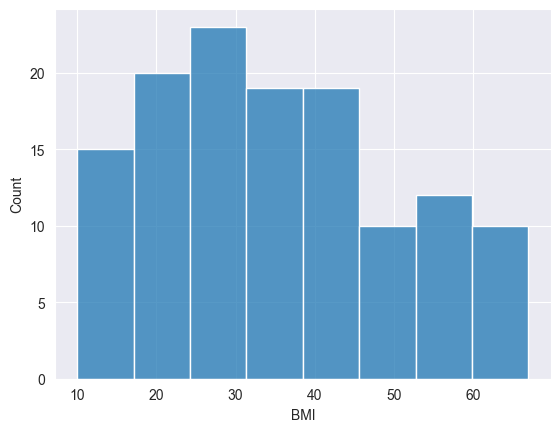

In [108]:
sns.histplot(df.BMI)

c:\Users\yunus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\yunus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\yunus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\yunus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now depreca

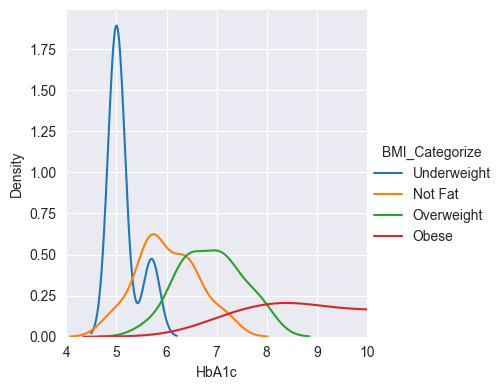

In [118]:
(sns
 .FacetGrid(df,
              hue = "BMI_Categorize",
              height = 4,
              xlim = (4, 10))
 .map(sns.kdeplot, "HbA1c", shade= False)
 .add_legend() #
);

<Axes: xlabel='HbA1c', ylabel='Count'>

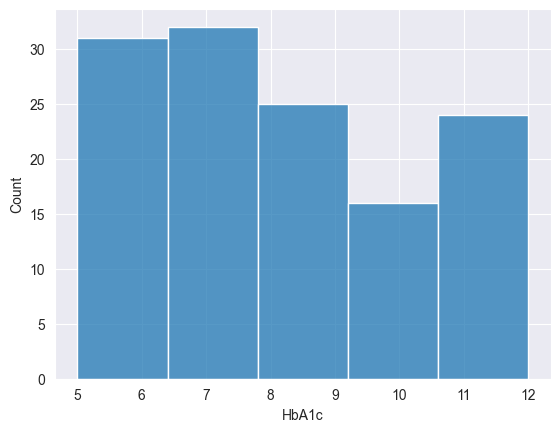

In [109]:
sns.histplot(df.HbA1c,bins=5, kde=False)

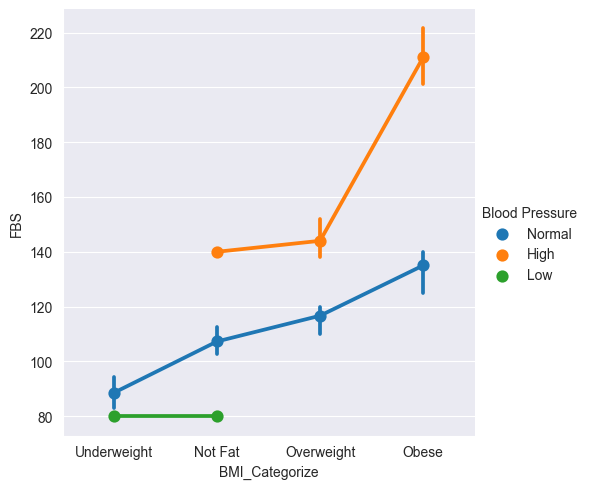

In [122]:
sns.catplot(x="BMI_Categorize", y="FBS", hue="Blood Pressure",kind="point", data=df)

<Axes: ylabel='FBS'>

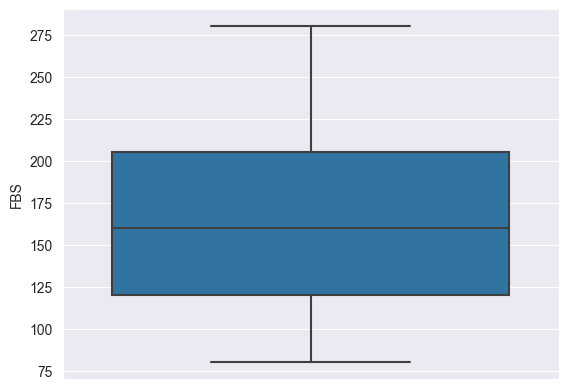

In [126]:
sns.boxplot(y=df["FBS"])

<Axes: xlabel='FBS', ylabel='Blood Pressure'>

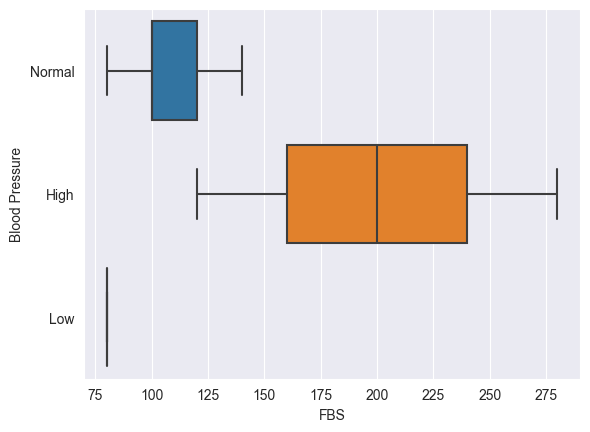

In [127]:
sns.boxplot(x=df["FBS"] , y = df["Blood Pressure"])

<Axes: xlabel='FBS', ylabel='Blood Pressure'>

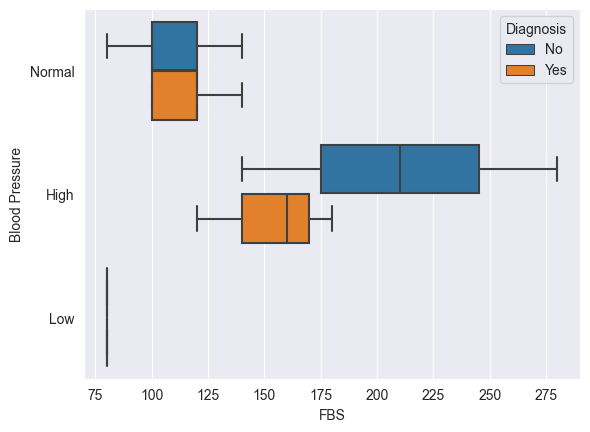

In [131]:
sns.boxplot(x=df["FBS"] , y = df["Blood Pressure"] , hue=df["Diagnosis"])

<Axes: xlabel='HbA1c', ylabel='Blood Pressure'>

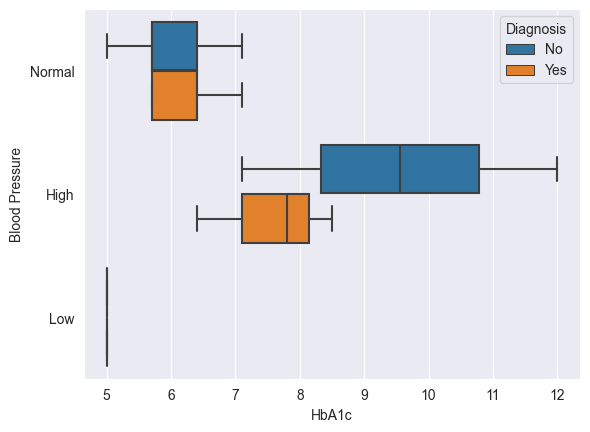

In [132]:
sns.boxplot(x=df["HbA1c"] , y = df["Blood Pressure"] , hue=df["Diagnosis"])

<Axes: ylabel='HbA1c'>

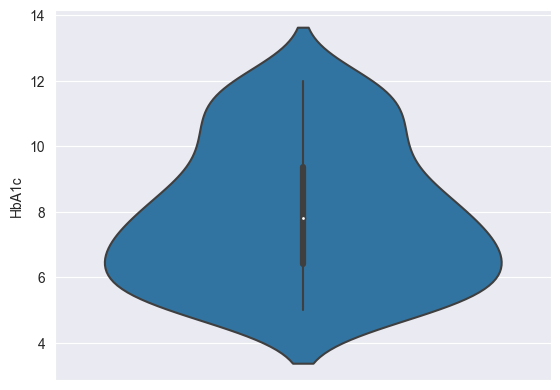

In [133]:
sns.violinplot(y="HbA1c", data=df)

<Axes: xlabel='Blood Pressure', ylabel='FBS'>

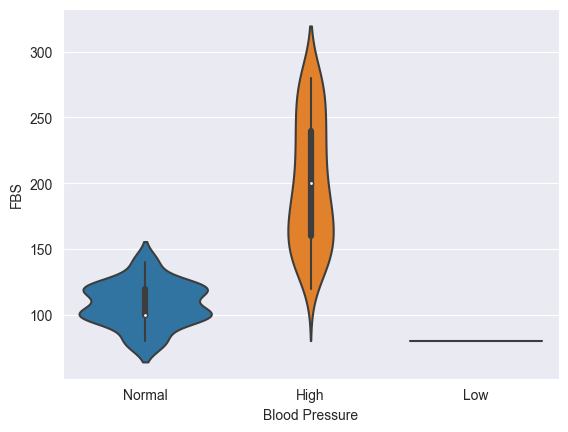

In [135]:
sns.violinplot(x="Blood Pressure", y="FBS", data=df)

<Axes: xlabel='Blood Pressure', ylabel='FBS'>

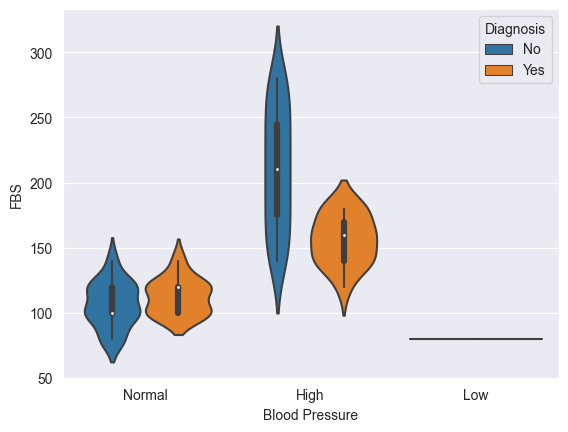

In [136]:
sns.violinplot(x="Blood Pressure", y="FBS", hue ="Diagnosis",data=df)

<Axes: xlabel='FBS', ylabel='BMI'>

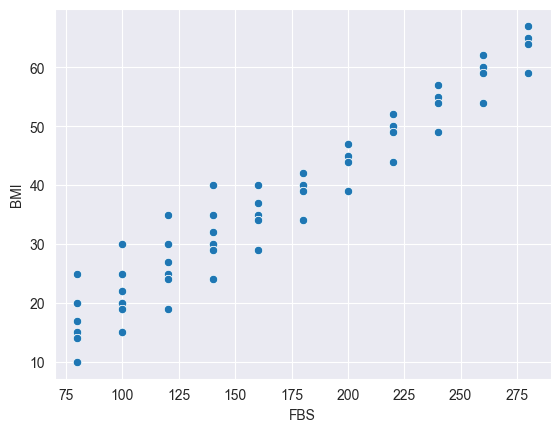

In [150]:
sns.scatterplot(x="FBS", y="BMI", data=df)

<Axes: xlabel='FBS', ylabel='BMI'>

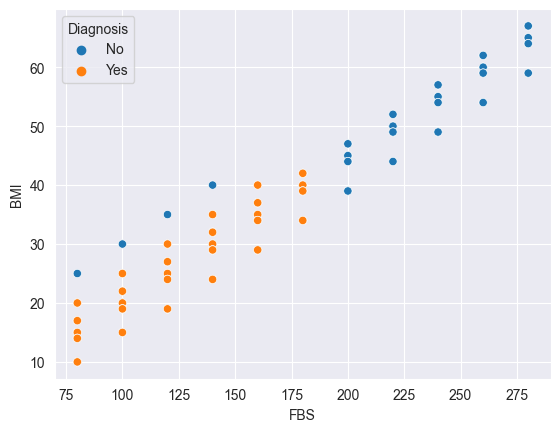

In [151]:
sns.scatterplot(x="FBS", y="BMI", hue="Diagnosis", data=df)

<Axes: xlabel='FBS', ylabel='BMI'>

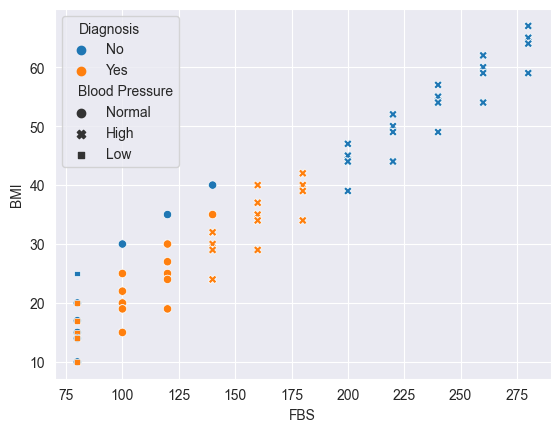

In [153]:
sns.scatterplot(x="FBS", y="BMI", hue="Diagnosis", style="Blood Pressure", data=df)

<Axes: xlabel='FBS', ylabel='BMI'>

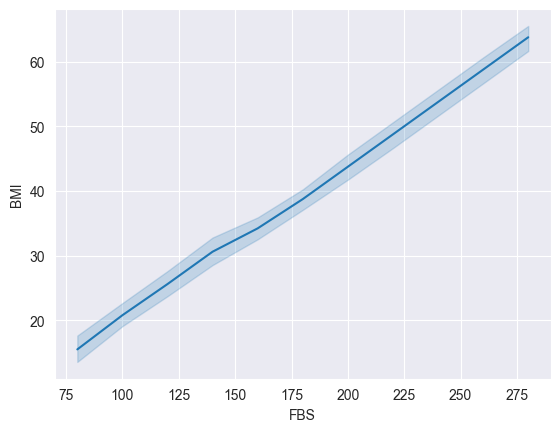

In [154]:
sns.lineplot(x="FBS", y="BMI", data=df)

<Axes: xlabel='FBS', ylabel='Age'>

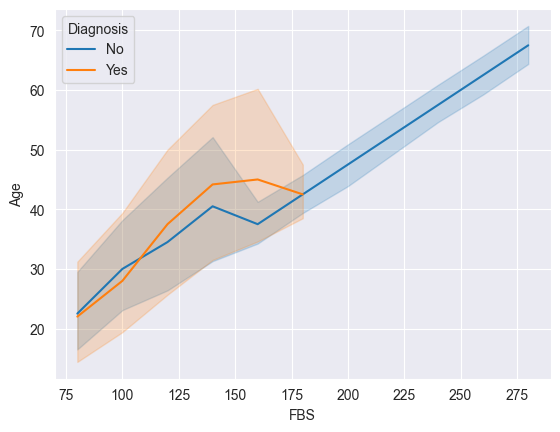

In [159]:
sns.lineplot(x="FBS", y="Age",hue="Diagnosis", data=df)

<Axes: xlabel='FBS', ylabel='Age'>

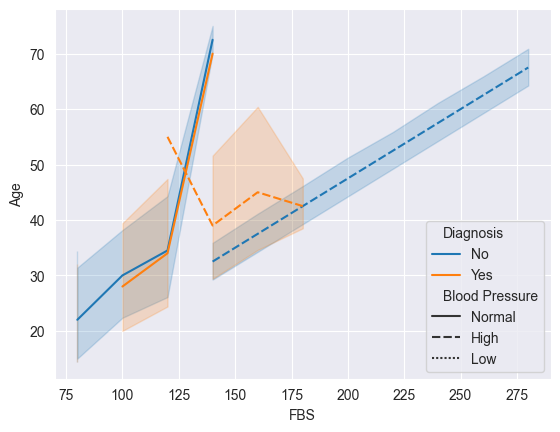

In [161]:
sns.lineplot(x="FBS",
            y="Age",
            hue="Diagnosis",
            style="Blood Pressure",
            data=df)

<Axes: >

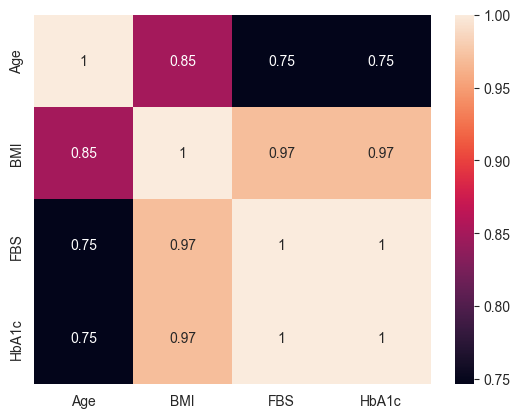

In [162]:
sns.heatmap(numeric_df.corr(), annot=True)

<Axes: >

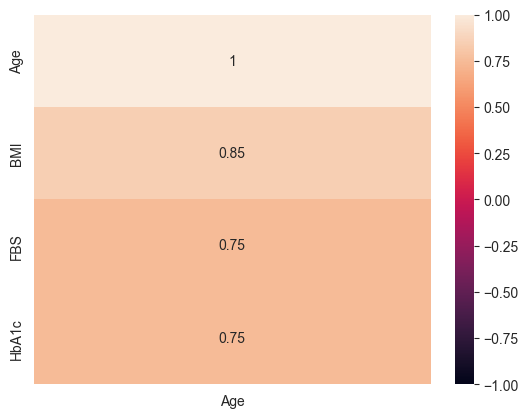

In [163]:
sns.heatmap(numeric_df.corr()[['Age']], vmin=-1, vmax=1, annot=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
